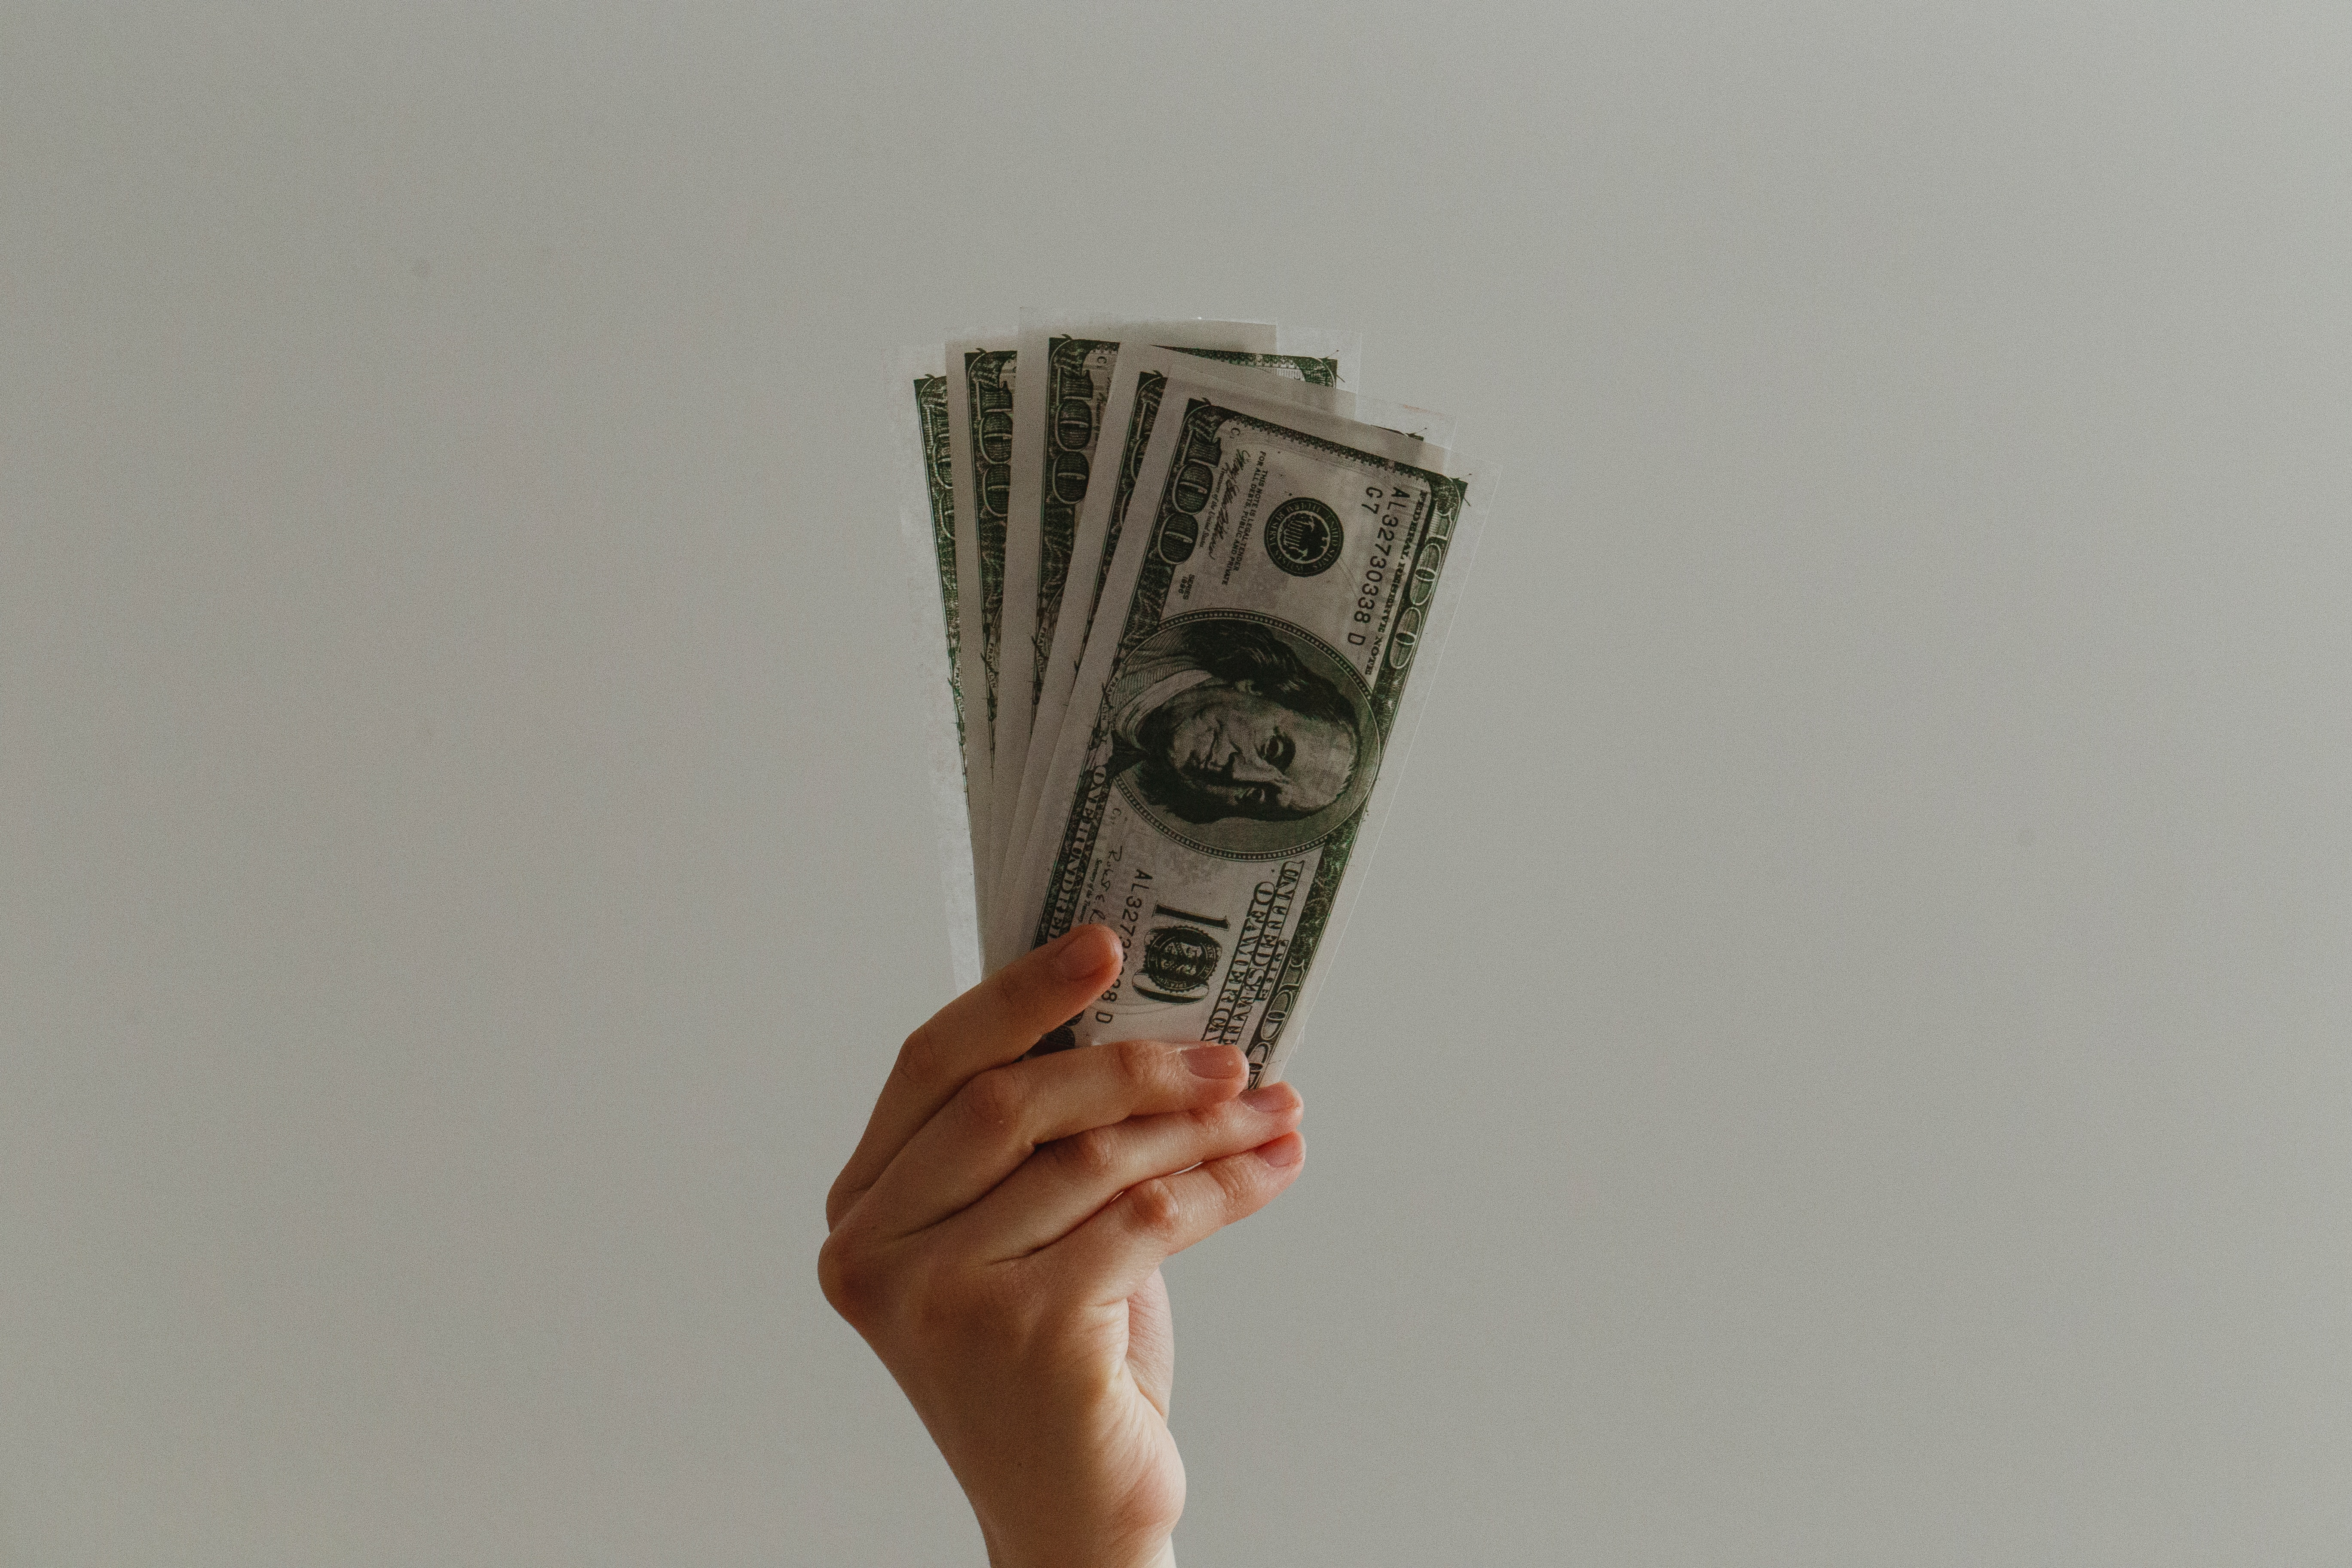

# 1.0 Introduction

What is the importance of estimating the income of a citizen? 

An individual's annual income can be influenced by a multitude of factors, such as education level, age, gender, occupation, and more. By developing a predictive model for income, we gain valuable insights into the dynamics of these contributing factors over time. This allows for a deeper understanding of the patterns and trends that affect income levels annually.

Moreover, employers can use these predictions to make data-driven decisions related to employee compensation, workforce planning, and talent acquisition. Also, policymakers can benefit from insights into income trends to formulate effective economics policies and social programs. 

dataset: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset

This dataset named “adult” is found in the UCI machine learning repository
http://www.cs.toronto.edu/~delve/data/adult/desc.html

The detailed description on the dataset can be found in the original UCI documentation
http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html

# 2.0 Imports + Data Overview 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("/Users/jonatas/Documents/repos/Portfolio_Projects/income/adult.csv")

In [3]:
df.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [4]:
df.shape

(48842, 15)

In [5]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
df.describe() #numerical vars

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
# No missing values. That's good
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [9]:
df1 = df.copy()

In [10]:
# On this dataset are presented observations as "?" which we cannot relate to something else.
# So, I decided to work without them.

df1 = df1[df1["workclass"] != "?"]
df1 = df1[df1["occupation"] != "?"]
df1 = df1[df1["native-country"] != "?"]
df1 = df1[df1["marital-status"] != "?"]
df1.shape

(45222, 15)

## 2.1 Univariate Exploration

In [11]:
df1.occupation.value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

### 2.0.1 Feature Engineering

In [12]:
# Dummies variable: "Male" == 1
df1["gender"] = df1['gender'].apply(lambda x: 1 if x =="Male" else 0 )

In [13]:
df1["income"].value_counts()

income
<=50K    34014
>50K     11208
Name: count, dtype: int64

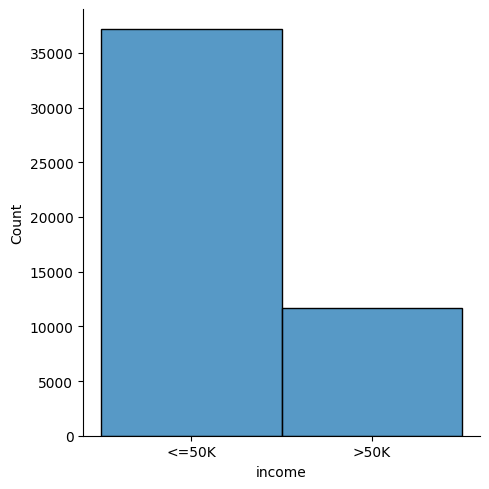

In [14]:
sns.displot(df['income'])

Income level is less than 50k is 3 times of those above 50k, indicating that the dataset is skewed(assimétrico). However, since there is no data on the upper limit of adult's income above 50K, it is premature to conclude that the total amount of wealth are skewed towards high icome group

In [15]:
df1["income"] = df1["income"].apply(lambda x: 1 if x==">50K" else 0)

### 2.1.1 Gender and Income Encoding

In [16]:
# Note: The number of observations for males is almost twice as much as for females.
df1["gender"].value_counts()

gender
1    30527
0    14695
Name: count, dtype: int64

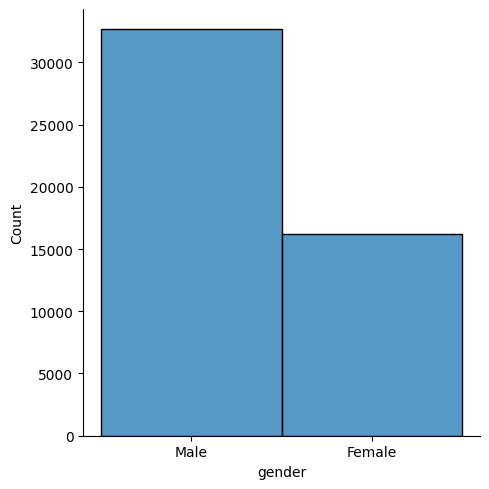

In [17]:
sns.displot(df['gender'])

### 2.1.2 Education

In [18]:
df1['education'].value_counts()

education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: count, dtype: int64

In [19]:
df1['educational-num'].value_counts()

educational-num
9     14783
10     9899
13     7570
14     2514
11     1959
7      1619
12     1507
6      1223
4       823
15      785
5       676
8       577
16      544
3       449
2       222
1        72
Name: count, dtype: int64

In [20]:
# In this dataset are found different educational levels. Let's group them. 

df1['education'].replace('Preschool', 'School',inplace=True)
df1['education'].replace('10th', 'School',inplace=True)
df1['education'].replace('11th', 'School',inplace=True)
df1['education'].replace('12th', 'School',inplace=True)
df1['education'].replace('1st-4th', 'School',inplace=True)
df1['education'].replace('5th-6th', 'School',inplace=True)
df1['education'].replace('7th-8th', 'School',inplace=True)
df1['education'].replace('9th', 'School',inplace=True)
df1['education'].replace('HS-Grad', 'HighSchool',inplace=True)
df1['education'].replace('Some-college', 'College',inplace=True)
df1['education'].replace('Assoc-acdm', 'College',inplace=True)
df1['education'].replace('Assoc-voc', 'College',inplace=True)
df1['education'].replace('Bachelors', 'Bachelors',inplace=True)
df1['education'].replace('Masters', 'Masters',inplace=True)
df1['education'].replace('Prof-school', 'Masters',inplace=True)
df1['education'].replace('Doctorate', 'Doctorate',inplace=True)

In [21]:
df1[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

education  educational-num
2  Doctorate        16.000000
4    Masters        14.237951
0  Bachelors        13.000000
1    College        10.372091
3    HS-grad         9.000000
5     School         5.621268

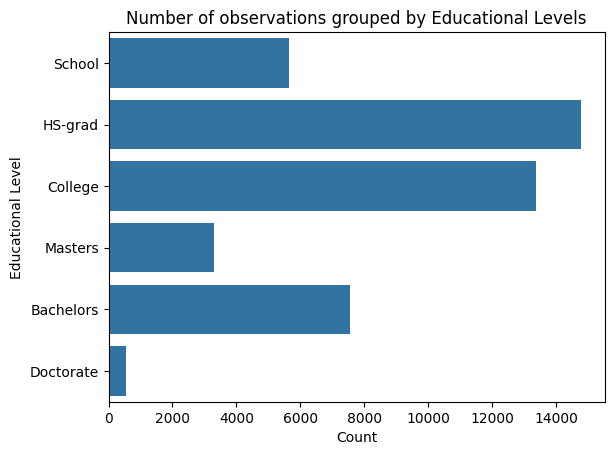

In [22]:
sns.countplot(y='education', data=df1)
plt.xlabel('Count')
plt.ylabel('Educational Level')
plt.title('Number of observations grouped by Educational Levels');

### 2.1.3 Marital Status

In [23]:
df1['marital-status'].value_counts()

marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: count, dtype: int64

In [24]:
# Let's make very similar to educational level

df1['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df1['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df1['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df1['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df1['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df1['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df1['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

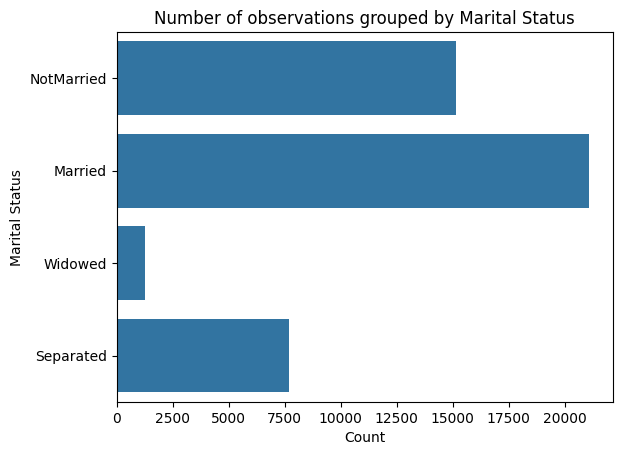

In [25]:
sns.countplot(y='marital-status', data=df1)
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Number of observations grouped by Marital Status');

### 2.1.4 Occupation

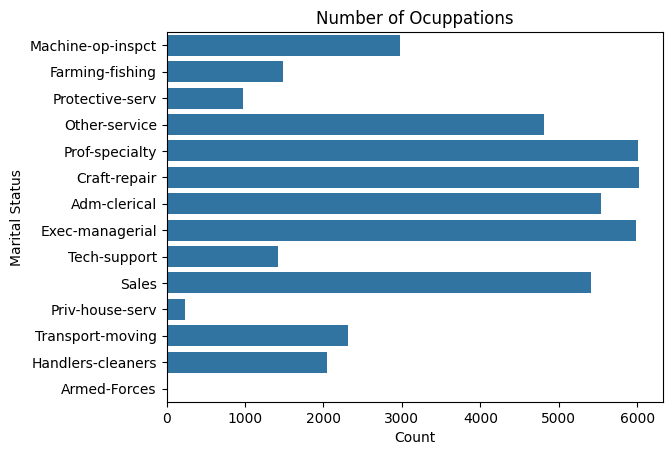

In [26]:
sns.countplot(y='occupation', data=df1)
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Number of Ocuppations');

In [27]:
# 14 observations for armed forces
df1["occupation"].value_counts()

occupation
Craft-repair         6020
Prof-specialty       6008
Exec-managerial      5984
Adm-clerical         5540
Sales                5408
Other-service        4808
Machine-op-inspct    2970
Transport-moving     2316
Handlers-cleaners    2046
Farming-fishing      1480
Tech-support         1420
Protective-serv       976
Priv-house-serv       232
Armed-Forces           14
Name: count, dtype: int64

### 2.1.5 Workclass

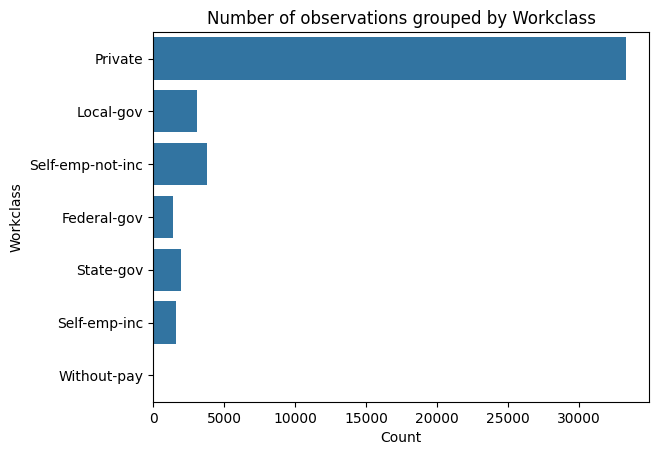

In [28]:
sns.countplot(y='workclass', data=df1)
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.title('Number of observations grouped by Workclass');

### 2.1.6 Age

In [29]:
df1[['income', 'age']].groupby(['income'], as_index=False).mean().sort_values(by='age', ascending=False)

income        age
1       1  44.006067
0       0  36.749427

In [30]:
# mean of all observations male and female
df1['age'].mean()

38.547941267524656

In [31]:
# median of all observations
df1['age'].median()

37.0

In [32]:
# max age in the dataset
df1['age'].max()

90

In [33]:
# min age in the dataset
df1['age'].min()

17

### 2.1.7 Race

In [34]:
df1['race'].value_counts()

race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: count, dtype: int64

<Axes: xlabel='race', ylabel='age'>

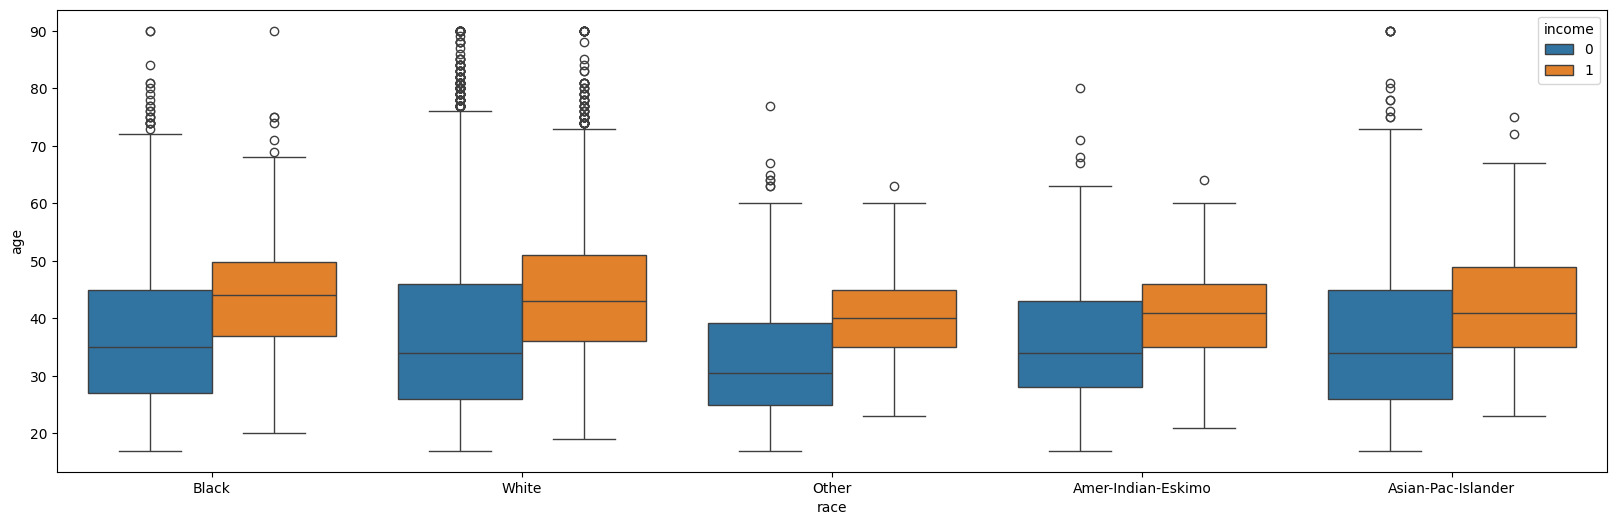

In [35]:
from matplotlib import pyplot
a4_dims = (20, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
race_inc = sns.boxplot(x="race", y="age", hue="income", data=df1)
race_inc

###  2.1.8 Hours of work

Text(0.5, 1.0, 'Distribution of hours-per-week')

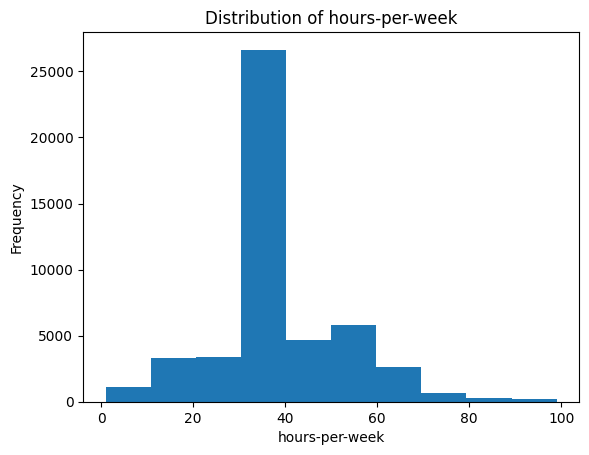

In [36]:
plt.hist(df['hours-per-week'])
# add labels and title
plt.xlabel('hours-per-week')
plt.ylabel('Frequency')
plt.title('Distribution of hours-per-week')

## 3.0 Bivariate Analysis


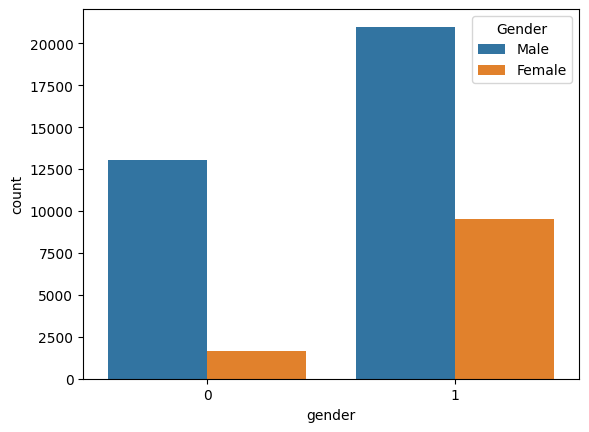

In [37]:
sns.countplot(x=df1['gender'], hue=df1['income'])
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.show()

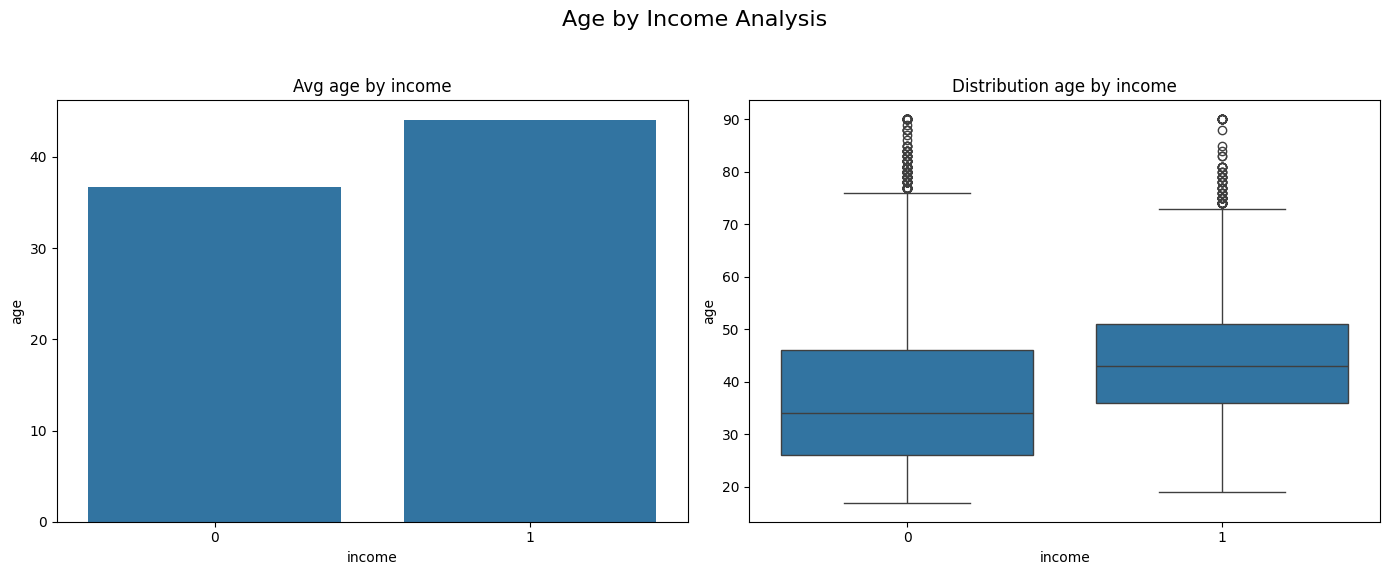

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
fig.suptitle('Age by Income Analysis', fontsize=16)

# Graph from the average age to above and below 50K
sns.barplot(x='income', y='age', data=df1, ax=axes[0], errorbar=None)
axes[0].set_title('Avg age by income')

# Distribution income X age
sns.boxplot(x='income', y='age', data=df1, ax=axes[1])
axes[1].set_title('Distribution age by income')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

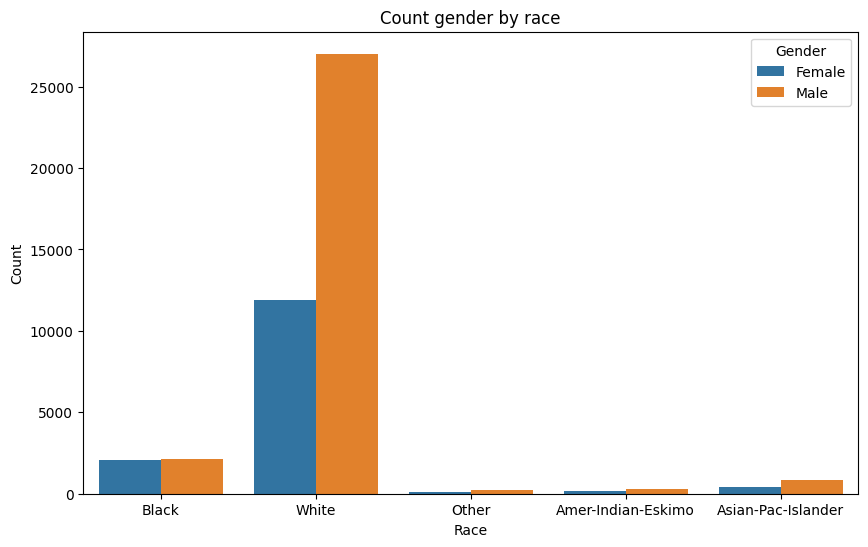

In [39]:
# graph gender by race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='gender', data=df1)

plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Count gender by race')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

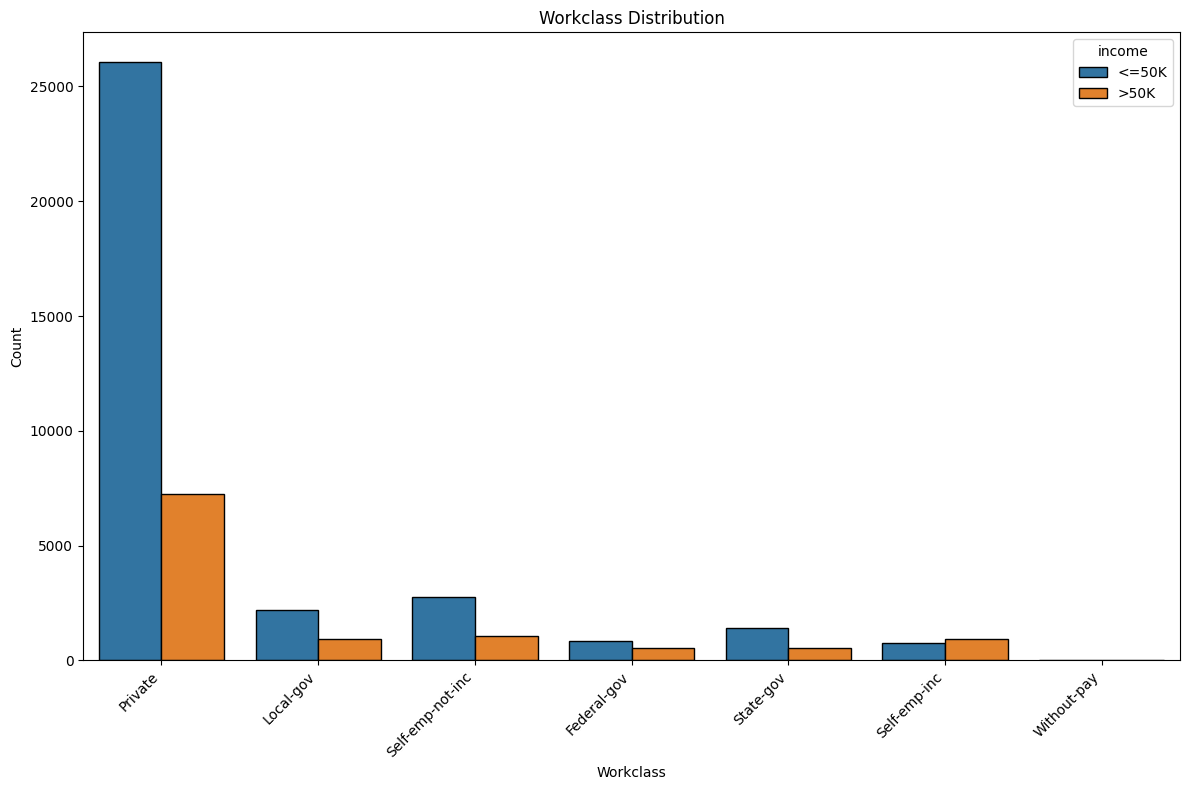

In [40]:
# What is the class distribution in the target variable "Income" (<=50K and >50K)?
plt.figure(figsize=(12, 8))
sns.countplot(x='workclass', hue='income', data=df1, edgecolor='k')

plt.title('Workclass Distribution')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='income', loc='upper right', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

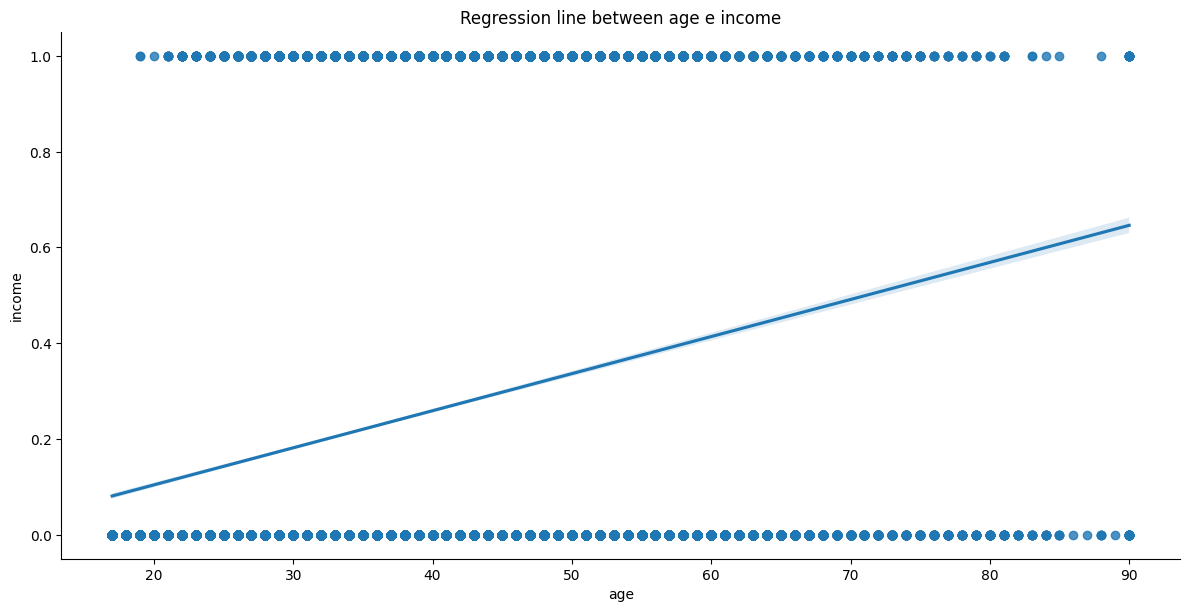

In [41]:
# Is there any correlation between age and income?
sns.lmplot(x='age', y='income', data=df1, aspect=2, height=6)
plt.title('Regression line between age e income')
plt.show()

In [42]:
# Correlação and  p-value
correlation, p_value = stats.pearsonr(df1['age'], df1['income'])

print(f"Correlation between age and income: {correlation}")
print(f"P-value: {p_value}")

Correlation between age and income: 0.23704023512370392
P-value: 0.0


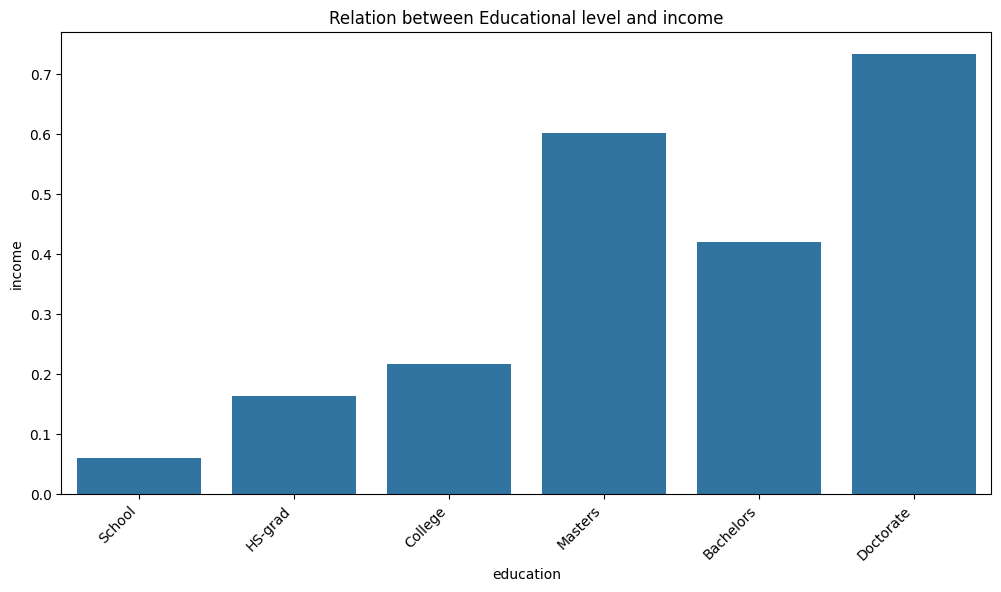

In [43]:
# How the income is influenced by educational level?

plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='income', data=df1, errorbar=None)
plt.title('Relation between Educational level and income')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
education_stats = df1.groupby('education')['income'].describe()
print(education_stats)

             count      mean       std  min  25%  50%  75%  max
education                                                      
Bachelors   7570.0  0.419815  0.493561  0.0  0.0  0.0  1.0  1.0
College    13365.0  0.216386  0.411796  0.0  0.0  0.0  0.0  1.0
Doctorate    544.0  0.733456  0.442559  0.0  0.0  1.0  1.0  1.0
HS-grad    14783.0  0.163431  0.369771  0.0  0.0  0.0  0.0  1.0
Masters     3299.0  0.601697  0.489623  0.0  0.0  1.0  1.0  1.0
School      5661.0  0.059707  0.236964  0.0  0.0  0.0  0.0  1.0


In [45]:
# correlation and p-value
correlation, p_value = stats.pearsonr(df1['educational-num'], df1['income'])

print(f"Correlation between education and income: {correlation}")
print(f"P-value: {p_value}")

Correlation between education and income: 0.3327998791762544
P-value: 0.0


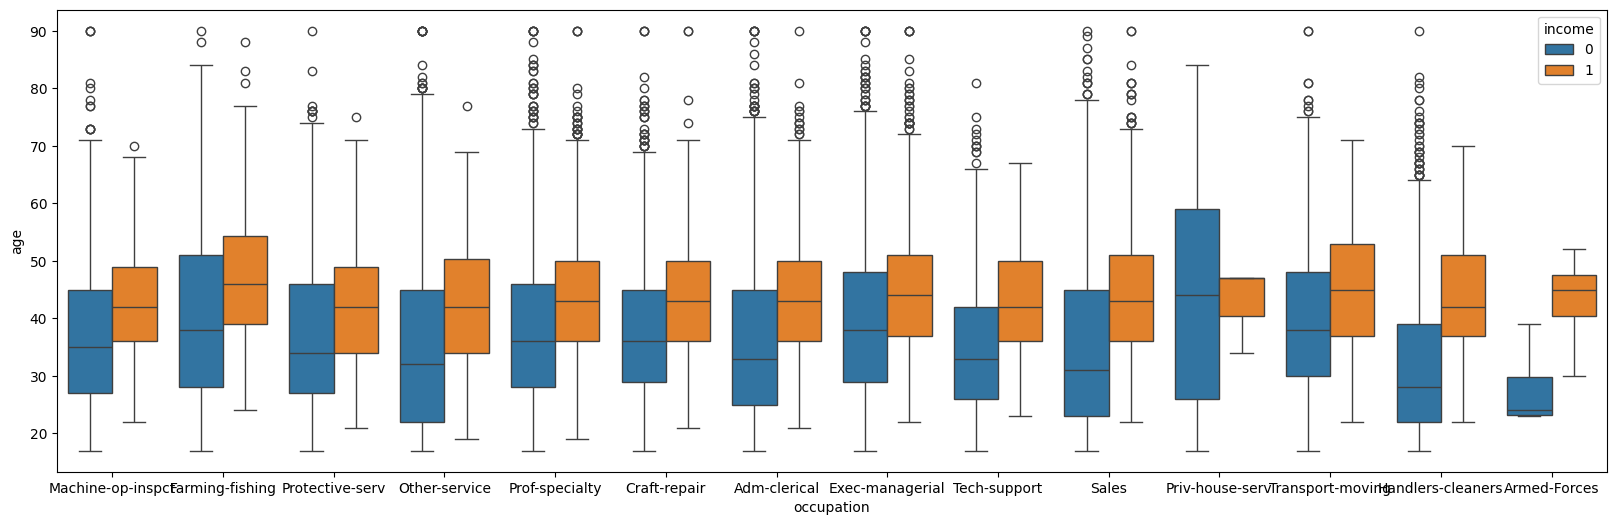

In [46]:
# Boxplot relating age and occupation
a4_dims = (20, 6)
fig, ax = pyplot.subplots(figsize=a4_dims)
occ_age_inc = sns.boxplot(x="occupation", y="age", hue="income", data=df1)
occ_age_inc;

# 4.0 One-Hot Encoding

In [47]:
# education is a non-numeric var, so let's drop it. Also educational-num is more aproppriated now.
# fnlwgt it's a variable I'm not interested in working with.
df1 = df1.drop('education', axis=1)
df1 = df1.drop('fnlwgt', axis=1)

In [48]:
categorical_columns = ['occupation', 'workclass', 'marital-status', 'relationship', 'race', 'native-country']

for col in categorical_columns:
    dummies = pd.get_dummies(df1[col], prefix=col, dtype=int)
    df1 = pd.concat([df1.drop(col, axis=1), dummies], axis=1)


In [49]:
df1.shape

(45222, 84)

In [50]:
df1.head()

age  educational-num  gender  capital-gain  capital-loss  hours-per-week  \
0   25                7       1             0             0              40   
1   38                9       1             0             0              50   
2   28               12       1             0             0              40   
3   44               10       1          7688             0              40   
5   34                6       1             0             0              30   

   income  occupation_Adm-clerical  occupation_Armed-Forces  \
0       0                        0                        0   
1       0                        0                        0   
2       1                        0                        0   
3       1                        0                        0   
5       0                        0                        0   

   occupation_Craft-repair  ...  native-country_Portugal  \
0                        0  ...                        0   
1                        0  ...                        0   
2                        0  ...                        0   
3                        0  ...                        0   
5                        0  ...                        0   

   native-country_Puerto-Rico  native-country_Scotland  native-country_South  \
0                           0                        0                     0   
1                           0                        0                     0   
2                           0                        0                     0   
3                           0                        0                     0   
5                           0                        0                     0   

   native-country_Taiwan  native-country_Thailand  \
0                      0                        0   
1                      0                        0   
2                      0                        0   
3                      0                        0   
5                      0                        0   

   native-country_Trinadad&Tobago  native-country_United-States  \
0                               0                             1   
1                               0                             1   
2                               0                             1   
3                               0                             1   
5                               0                             1   

   native-country_Vietnam  native-country_Yugoslavia  
0                       0                          0  
1                       0                          0  
2                       0                          0  
3                       0                          0  
5                       0                          0  

[5 rows x 84 columns]

<Axes: >

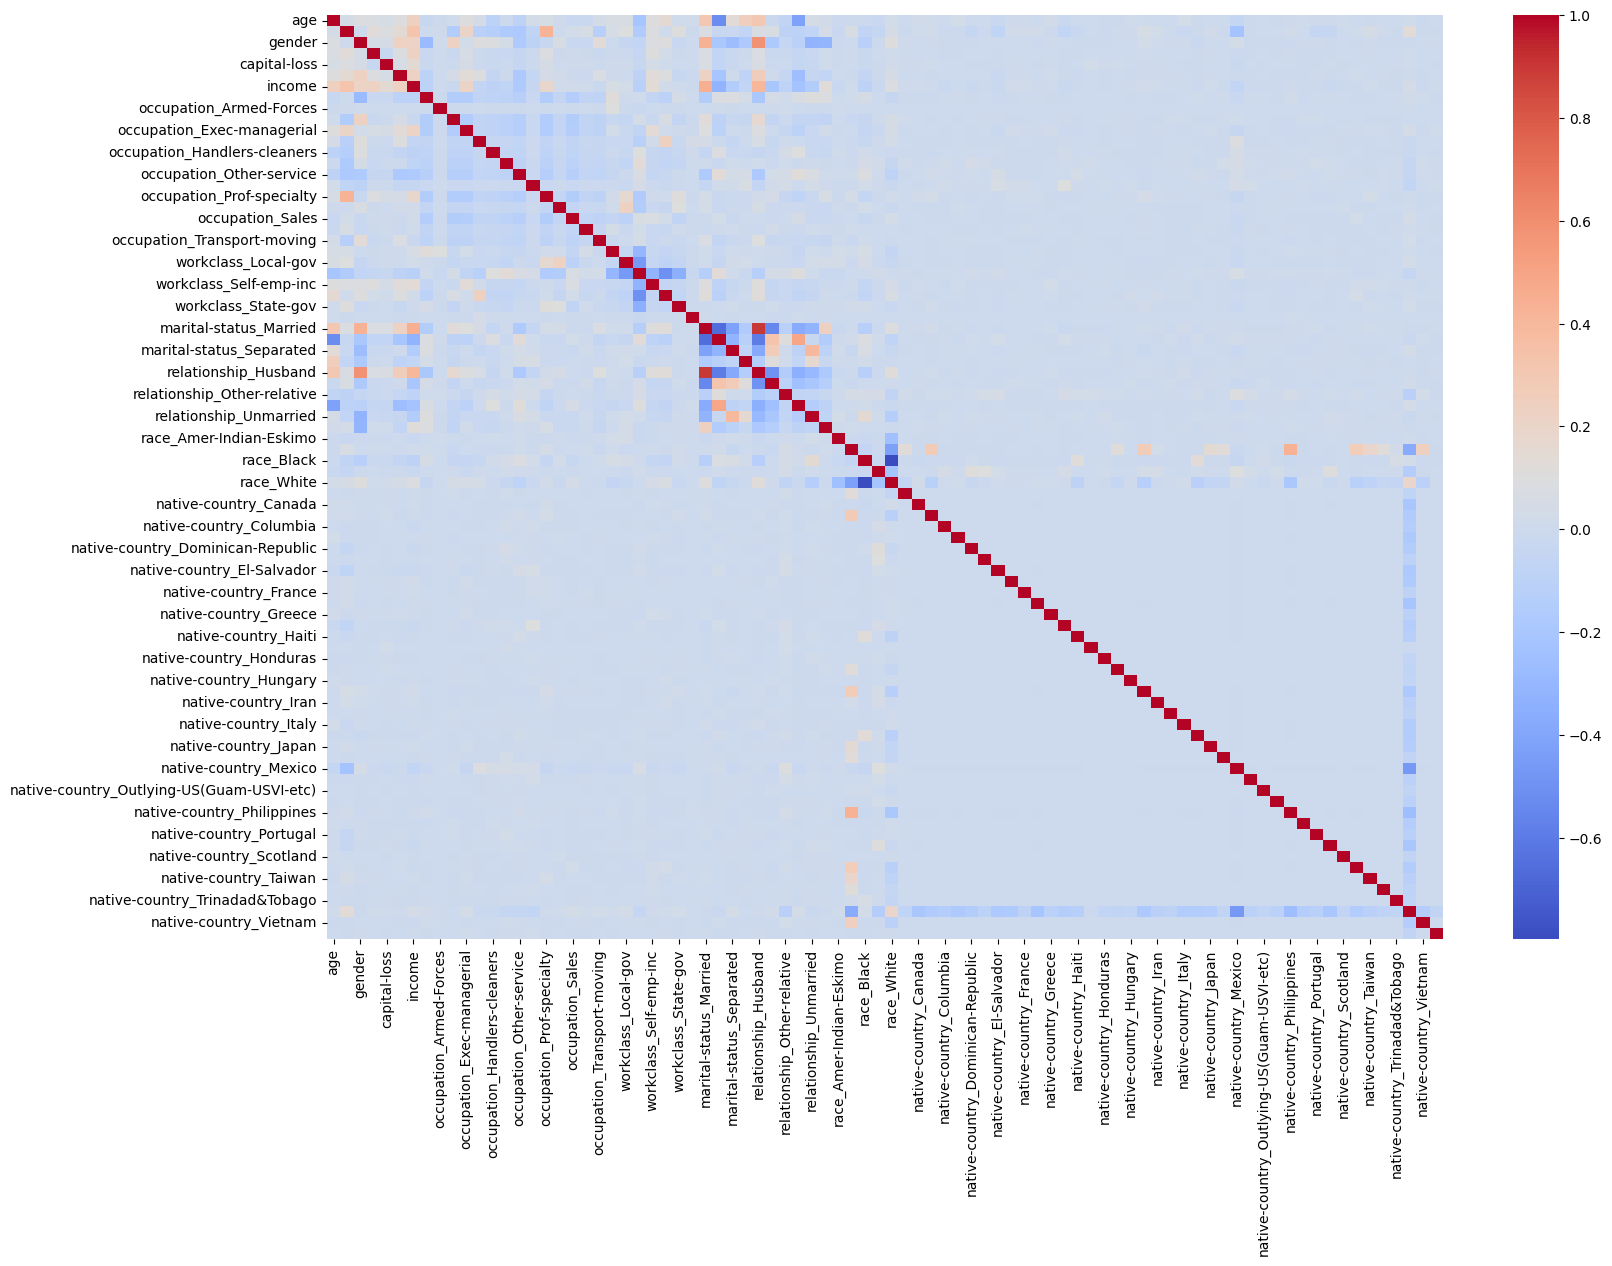

In [51]:
plt.figure(figsize=(18,12))
sns.heatmap(df1.corr(), annot=False, cmap='coolwarm')

We are looking for featues that are positivey or negatively correlated to the income. Howeever we have so many features after using one hot encoding. 

We going to filter the feature that are more correlated with income

In [52]:
# abs= absolute values
# we're looking for correlations near the 1 ou -1
correlations = df1.corr()['income'].abs()  
sorted_corr = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df1.columns)) # for visualization lets drop 80% of the features
cols_to_drop = sorted_corr.iloc[:num_cols_to_drop].index
df2 = df1.drop(cols_to_drop, axis = 1)

<Axes: >

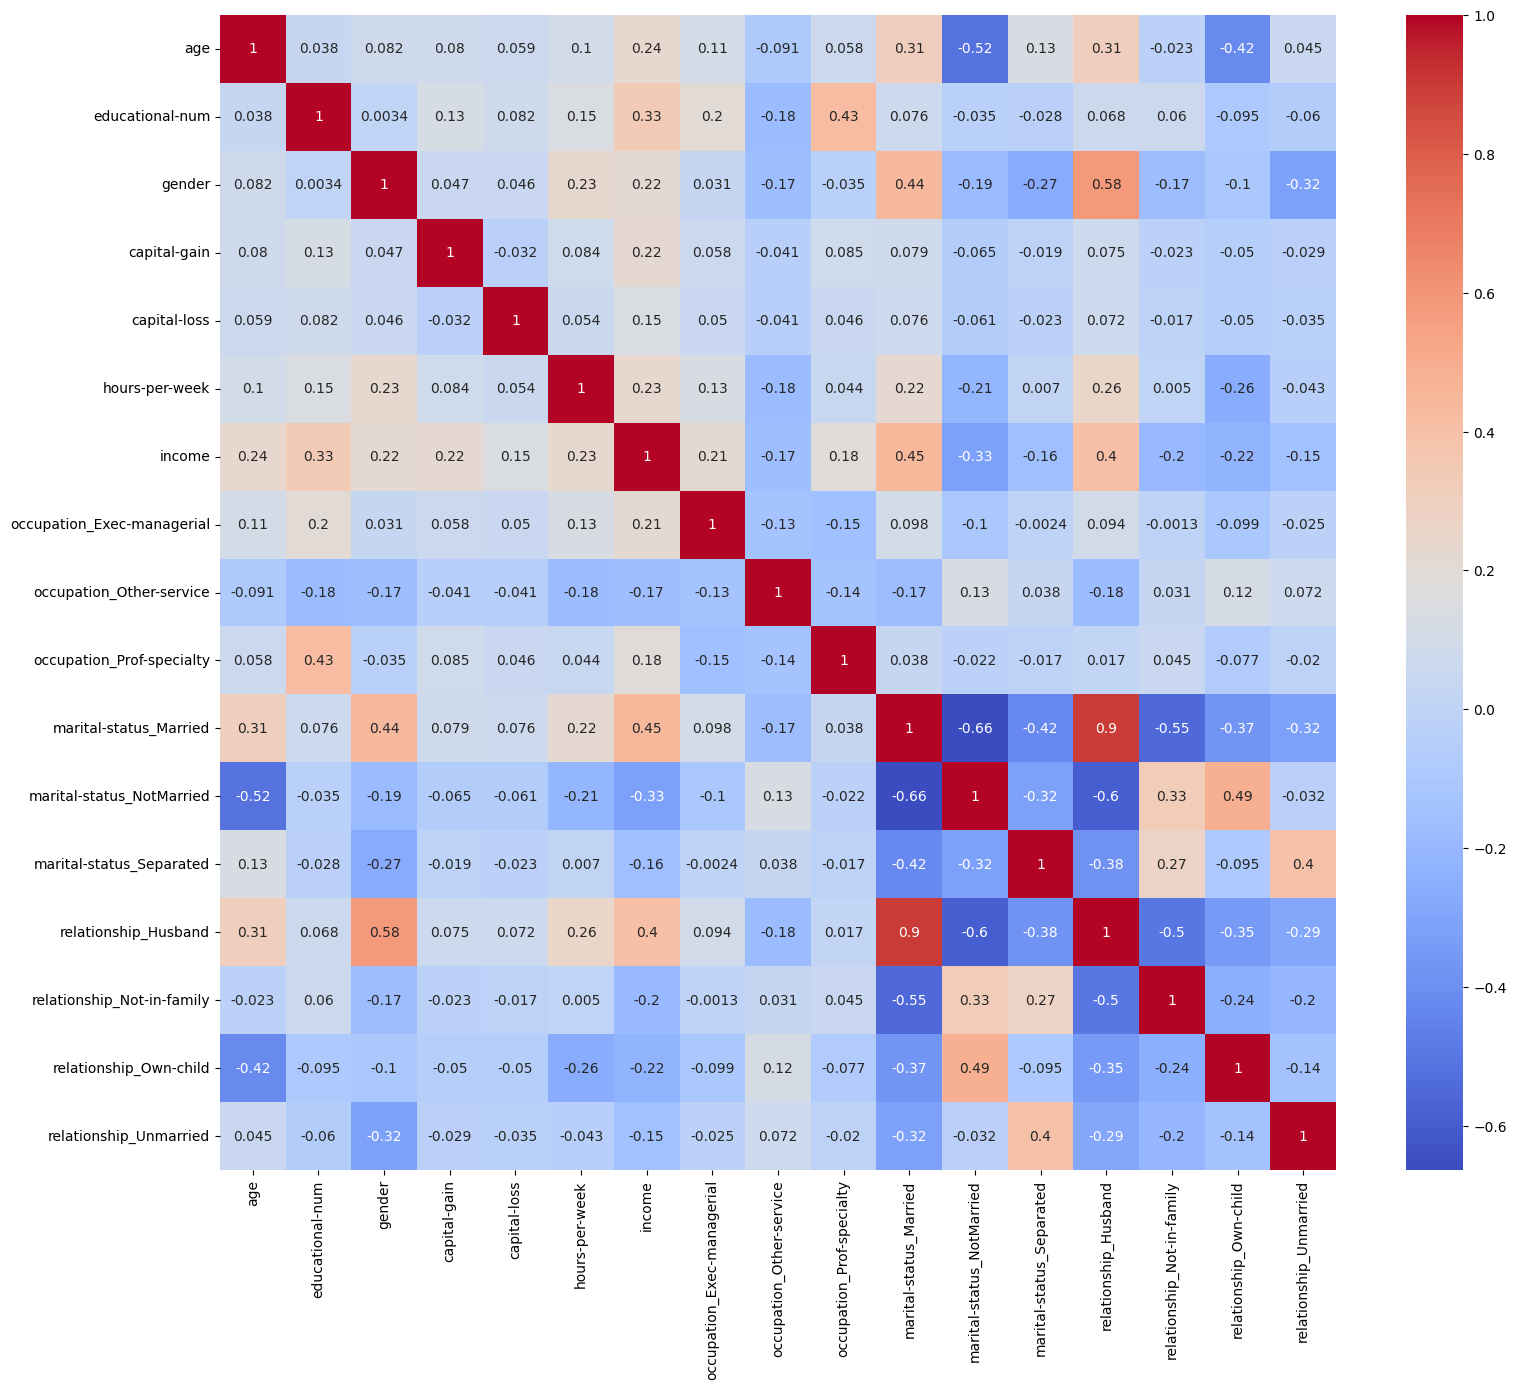

In [53]:
# plotting the heatmap
plt.figure(figsize=(18,15))
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm')

### A few insights observed through the heatmap:

**Positively correlated**

1. Marital status is important to the income;
2. Relatioship status - husband, 
3. Year of experience, 
4. high education. 

**Negatively correlated**
1. Never married.

Correlations between features it is not the same as the features importances. 

Lets train a random forest classifier. We choose this model because the nature of that it's very "Yes/No decision". We have a lot of binary features. Decision tree has brenchs and nots, etc...

# 5.0 Random Forest Classifier

In [54]:
train_df1, test_df1 = train_test_split(df1, test_size=0.2)

In [55]:
train_X = train_df1.drop('income', axis=1)
train_y = train_df1['income']

test_X = test_df1.drop('income', axis=1)
test_y = test_df1['income']

In [56]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


RandomForestClassifier()

In [57]:
# 84% predicting right if this person earn more or less than 50K
forest.score(test_X, test_y)

/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.8465450525152017

## 5.1 Feature Importances

In [58]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [59]:
# The older you get, the higher your education, more you work, higher your income will be
# random forest is informing the importance of the features
importances

{'age': 0.2304148712102715,
 'educational-num': 0.1328189797978031,
 'hours-per-week': 0.11464508460755216,
 'capital-gain': 0.10607134111652552,
 'marital-status_Married': 0.06683030195880453,
 'relationship_Husband': 0.05134485483908589,
 'capital-loss': 0.03773264178469574,
 'marital-status_NotMarried': 0.03748387442284187,
 'occupation_Exec-managerial': 0.018250733480562848,
 'occupation_Prof-specialty': 0.016862348034378406,
 'gender': 0.01094247853965847,
 'marital-status_Separated': 0.010292902802882364,
 'relationship_Not-in-family': 0.009880715620446899,
 'workclass_Private': 0.009621110160568151,
 'occupation_Other-service': 0.008377336351751861,
 'workclass_Self-emp-not-inc': 0.007891842030248938,
 'relationship_Own-child': 0.007526643348916835,
 'occupation_Craft-repair': 0.00683864820199893,
 'relationship_Wife': 0.00668634724533695,
 'occupation_Sales': 0.006437277618058707,
 'workclass_Self-emp-inc': 0.006177899758764763,
 'race_White': 0.006123063298274005,
 'native-cou

## 5. 2 Hyperparameter Tuning

In [60]:
# they will test in combination
param_grid = {
    'n_estimators': [50, 100, 250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']    
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [61]:
grid_search.fit(train_X, train_y)

/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.827 total time=   0.4s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.836 total time=   0.4s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   0.4s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.4s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.838 total time=   0.3s
[CV 1/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 2/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.834 total time=   0.6s
[CV 2/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 2/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.837 total time=   0.6s
[CV 3/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 2/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.832 total time=   0.6s
[CV 4/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 2/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.841 total time=   0.7s
[CV 5/5; 2/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 2/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.835 total time=   0.7s
[CV 1/5; 3/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 3/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.833 total time=   1.6s
[CV 2/5; 3/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 3/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.835 total time=   1.6s
[CV 3/5; 3/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 3/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.840 total time=   1.6s
[CV 4/5; 3/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 3/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.843 total time=   1.6s
[CV 5/5; 3/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 3/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.834 total time=   1.7s
[CV 1/5; 4/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 4/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.833 total time=   0.3s
[CV 2/5; 4/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 4/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.834 total time=   0.4s
[CV 3/5; 4/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 4/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.839 total time=   0.4s
[CV 4/5; 4/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 4/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.835 total time=   0.4s
[CV 5/5; 4/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 4/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.834 total time=   0.4s
[CV 1/5; 5/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 5/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.831 total time=   0.7s
[CV 2/5; 5/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 5/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.837 total time=   0.7s
[CV 3/5; 5/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 5/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.840 total time=   0.7s
[CV 4/5; 5/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 5/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.842 total time=   0.6s
[CV 5/5; 5/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 5/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.839 total time=   0.7s
[CV 1/5; 6/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 6/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.831 total time=   1.6s
[CV 2/5; 6/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 6/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.837 total time=   1.6s
[CV 3/5; 6/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 6/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.841 total time=   1.6s
[CV 4/5; 6/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 6/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.839 total time=   1.6s
[CV 5/5; 6/48] START max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 6/48] END max_depth=5, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.837 total time=   1.7s
[CV 1/5; 7/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 7/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.818 total time=   0.3s
[CV 2/5; 7/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 7/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.816 total time=   0.3s
[CV 3/5; 7/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 7/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.824 total time=   0.3s
[CV 4/5; 7/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 7/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.826 total time=   0.3s
[CV 5/5; 7/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 7/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.819 total time=   0.3s
[CV 1/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.820 total time=   0.5s
[CV 2/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.813 total time=   0.5s
[CV 3/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.817 total time=   0.5s
[CV 4/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.823 total time=   0.6s
[CV 5/5; 8/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 8/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.822 total time=   0.5s
[CV 1/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.813 total time=   1.3s
[CV 2/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.816 total time=   1.4s
[CV 3/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.820 total time=   1.3s
[CV 4/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.822 total time=   1.4s
[CV 5/5; 9/48] START max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 9/48] END max_depth=5, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.822 total time=   1.4s
[CV 1/5; 10/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 10/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.828 total time=   0.3s
[CV 2/5; 10/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 10/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.806 total time=   0.3s
[CV 3/5; 10/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 10/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.827 total time=   0.3s
[CV 4/5; 10/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 10/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.810 total time=   0.3s
[CV 5/5; 10/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 10/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.813 total time=   0.3s
[CV 1/5; 11/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 11/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.818 total time=   0.6s
[CV 2/5; 11/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 11/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.819 total time=   0.6s
[CV 3/5; 11/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 11/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.829 total time=   0.6s
[CV 4/5; 11/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 11/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.825 total time=   0.5s
[CV 5/5; 11/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 11/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.816 total time=   0.5s
[CV 1/5; 12/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 12/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.817 total time=   1.3s
[CV 2/5; 12/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 12/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.813 total time=   1.5s
[CV 3/5; 12/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 12/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.819 total time=   1.4s
[CV 4/5; 12/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 12/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.822 total time=   1.4s
[CV 5/5; 12/48] START max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 12/48] END max_depth=5, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.815 total time=   1.3s
[CV 1/5; 13/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 13/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.850 total time=   0.5s
[CV 2/5; 13/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 13/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.5s
[CV 3/5; 13/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 13/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.5s
[CV 4/5; 13/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 13/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.861 total time=   0.5s
[CV 5/5; 13/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 13/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.857 total time=   0.5s
[CV 1/5; 14/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 14/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.851 total time=   0.9s
[CV 2/5; 14/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 14/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.856 total time=   0.9s
[CV 3/5; 14/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 14/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.859 total time=   0.9s
[CV 4/5; 14/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 14/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.860 total time=   0.9s
[CV 5/5; 14/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 14/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.9s
[CV 1/5; 15/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 15/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.851 total time=   2.5s
[CV 2/5; 15/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 15/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.855 total time=   2.3s
[CV 3/5; 15/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 15/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.860 total time=   2.4s
[CV 4/5; 15/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 15/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.862 total time=   2.4s
[CV 5/5; 15/48] START max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 15/48] END max_depth=10, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.858 total time=   2.5s
[CV 1/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.851 total time=   0.5s
[CV 2/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.856 total time=   0.5s
[CV 3/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.858 total time=   0.5s
[CV 4/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.860 total time=   0.5s
[CV 5/5; 16/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 16/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.858 total time=   0.5s
[CV 1/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.851 total time=   1.0s
[CV 2/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.857 total time=   1.1s
[CV 3/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.858 total time=   1.0s
[CV 4/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.861 total time=   1.0s
[CV 5/5; 17/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 17/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.858 total time=   1.0s
[CV 1/5; 18/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 18/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.851 total time=   2.4s
[CV 2/5; 18/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 18/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.855 total time=   2.4s
[CV 3/5; 18/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 18/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.860 total time=   2.5s
[CV 4/5; 18/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 18/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.861 total time=   2.5s
[CV 5/5; 18/48] START max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 18/48] END max_depth=10, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.858 total time=   2.4s
[CV 1/5; 19/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 19/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.847 total time=   0.4s
[CV 2/5; 19/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 19/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.854 total time=   0.4s
[CV 3/5; 19/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 19/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.853 total time=   0.4s
[CV 4/5; 19/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 19/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.856 total time=   0.5s
[CV 5/5; 19/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 19/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.5s
[CV 1/5; 20/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 20/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.847 total time=   0.9s
[CV 2/5; 20/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 20/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.851 total time=   0.8s
[CV 3/5; 20/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 20/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.855 total time=   0.8s
[CV 4/5; 20/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 20/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.854 total time=   0.8s
[CV 5/5; 20/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 20/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.855 total time=   0.8s
[CV 1/5; 21/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 21/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.848 total time=   1.9s
[CV 2/5; 21/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 21/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.852 total time=   2.0s
[CV 3/5; 21/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 21/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.855 total time=   2.0s
[CV 4/5; 21/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 21/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.859 total time=   2.0s
[CV 5/5; 21/48] START max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 21/48] END max_depth=10, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.853 total time=   2.0s
[CV 1/5; 22/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 22/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.849 total time=   0.4s
[CV 2/5; 22/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 22/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.850 total time=   0.4s
[CV 3/5; 22/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 22/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.859 total time=   0.4s
[CV 4/5; 22/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 22/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.852 total time=   0.4s
[CV 5/5; 22/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 22/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.853 total time=   0.4s
[CV 1/5; 23/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 23/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.848 total time=   0.8s
[CV 2/5; 23/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 23/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.852 total time=   0.8s
[CV 3/5; 23/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 23/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.857 total time=   0.9s
[CV 4/5; 23/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 23/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.859 total time=   0.8s
[CV 5/5; 23/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 23/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.854 total time=   0.8s
[CV 1/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.848 total time=   1.9s
[CV 2/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.852 total time=   2.0s
[CV 3/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.857 total time=   1.9s
[CV 4/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.859 total time=   2.0s
[CV 5/5; 24/48] START max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 24/48] END max_depth=10, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   2.1s
[CV 1/5; 25/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 25/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.850 total time=   0.9s
[CV 2/5; 25/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 25/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.860 total time=   0.9s
[CV 3/5; 25/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 25/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.852 total time=   0.9s
[CV 4/5; 25/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 25/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.9s
[CV 5/5; 25/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 25/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.855 total time=   1.0s
[CV 1/5; 26/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 26/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.850 total time=   1.8s
[CV 2/5; 26/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 26/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.861 total time=   2.1s
[CV 3/5; 26/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 26/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.856 total time=   1.9s
[CV 4/5; 26/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 26/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.857 total time=   1.8s
[CV 5/5; 26/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 26/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.853 total time=   1.8s
[CV 1/5; 27/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.851 total time=   4.5s
[CV 2/5; 27/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.860 total time=   4.7s
[CV 3/5; 27/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.856 total time=   4.4s
[CV 4/5; 27/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.858 total time=   4.9s
[CV 5/5; 27/48] START max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 27/48] END max_depth=30, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.854 total time=   4.6s
[CV 1/5; 28/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 28/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.854 total time=   0.9s
[CV 2/5; 28/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 28/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.862 total time=   0.9s
[CV 3/5; 28/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 28/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.857 total time=   1.0s
[CV 4/5; 28/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 28/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.860 total time=   0.9s
[CV 5/5; 28/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 28/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.860 total time=   0.9s
[CV 1/5; 29/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 29/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.852 total time=   1.8s
[CV 2/5; 29/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 29/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.862 total time=   1.8s
[CV 3/5; 29/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 29/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.859 total time=   2.0s
[CV 4/5; 29/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 29/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.863 total time=   1.7s
[CV 5/5; 29/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 29/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.859 total time=   1.8s
[CV 1/5; 30/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 30/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.854 total time=   4.4s
[CV 2/5; 30/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 30/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.863 total time=   4.5s
[CV 3/5; 30/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 30/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.860 total time=   4.7s
[CV 4/5; 30/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 30/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.862 total time=   4.4s
[CV 5/5; 30/48] START max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 30/48] END max_depth=30, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.862 total time=   4.5s
[CV 1/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.851 total time=   0.8s
[CV 2/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.858 total time=   0.8s
[CV 3/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.8s
[CV 4/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.855 total time=   0.8s
[CV 5/5; 31/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 31/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.856 total time=   0.8s
[CV 1/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.851 total time=   1.6s
[CV 2/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.859 total time=   1.6s
[CV 3/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.857 total time=   1.7s
[CV 4/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.858 total time=   1.6s
[CV 5/5; 32/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 32/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.857 total time=   1.6s
[CV 1/5; 33/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 33/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.853 total time=   4.1s
[CV 2/5; 33/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 33/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.860 total time=   4.2s
[CV 3/5; 33/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 33/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.856 total time=   4.0s
[CV 4/5; 33/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 33/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.859 total time=   4.4s
[CV 5/5; 33/48] START max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 33/48] END max_depth=30, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.858 total time=   4.0s
[CV 1/5; 34/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 34/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.853 total time=   0.8s
[CV 2/5; 34/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 34/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.861 total time=   0.8s
[CV 3/5; 34/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 34/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.859 total time=   0.8s
[CV 4/5; 34/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 34/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.863 total time=   0.7s
[CV 5/5; 34/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 34/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.859 total time=   0.8s
[CV 1/5; 35/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 35/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.853 total time=   1.6s
[CV 2/5; 35/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 35/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.862 total time=   1.6s
[CV 3/5; 35/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 35/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.859 total time=   1.8s
[CV 4/5; 35/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 35/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.862 total time=   1.6s
[CV 5/5; 35/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 35/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.859 total time=   1.5s
[CV 1/5; 36/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 36/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   3.8s
[CV 2/5; 36/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 36/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.861 total time=   4.0s
[CV 3/5; 36/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 36/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.859 total time=   3.9s
[CV 4/5; 36/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 36/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.862 total time=   4.1s
[CV 5/5; 36/48] START max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 36/48] END max_depth=30, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.862 total time=   3.8s
[CV 1/5; 37/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 37/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   1.0s
[CV 2/5; 37/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 37/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.851 total time=   1.0s
[CV 3/5; 37/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 37/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.846 total time=   1.2s
[CV 4/5; 37/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 37/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.846 total time=   1.1s
[CV 5/5; 37/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 37/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   1.1s
[CV 1/5; 38/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 38/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.842 total time=   2.1s
[CV 2/5; 38/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 38/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.850 total time=   2.1s
[CV 3/5; 38/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 38/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.848 total time=   2.0s
[CV 4/5; 38/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 38/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.846 total time=   1.9s
[CV 5/5; 38/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 38/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.842 total time=   2.2s
[CV 1/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.840 total time=   5.3s
[CV 2/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.851 total time=   5.2s
[CV 3/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.849 total time=   5.0s
[CV 4/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.847 total time=   5.4s
[CV 5/5; 39/48] START max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 39/48] END max_depth=None, max_features=sqrt, min_samples_split=2, n_estimators=250;, score=0.842 total time=   5.1s
[CV 1/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.849 total time=   0.9s
[CV 2/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.856 total time=   0.9s
[CV 3/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.849 total time=   0.9s
[CV 4/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.853 total time=   0.9s
[CV 5/5; 40/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 40/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=50;, score=0.847 total time=   1.0s
[CV 1/5; 41/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 41/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.845 total time=   1.9s
[CV 2/5; 41/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 41/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.858 total time=   1.9s
[CV 3/5; 41/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 41/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.851 total time=   2.1s
[CV 4/5; 41/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 41/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.853 total time=   1.9s
[CV 5/5; 41/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 41/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=100;, score=0.851 total time=   1.8s
[CV 1/5; 42/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 42/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.846 total time=   4.8s
[CV 2/5; 42/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 42/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.857 total time=   5.1s
[CV 3/5; 42/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 42/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.852 total time=   5.0s
[CV 4/5; 42/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 42/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.853 total time=   4.7s
[CV 5/5; 42/48] START max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 42/48] END max_depth=None, max_features=sqrt, min_samples_split=4, n_estimators=250;, score=0.849 total time=   4.9s
[CV 1/5; 43/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 43/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.840 total time=   0.9s
[CV 2/5; 43/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 43/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.850 total time=   0.9s
[CV 3/5; 43/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 43/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.845 total time=   0.9s
[CV 4/5; 43/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 43/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.842 total time=   0.9s
[CV 5/5; 43/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 43/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=50;, score=0.839 total time=   0.9s
[CV 1/5; 44/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 44/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.841 total time=   1.8s
[CV 2/5; 44/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 44/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.849 total time=   1.9s
[CV 3/5; 44/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 44/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.846 total time=   1.8s
[CV 4/5; 44/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 44/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.843 total time=   1.8s
[CV 5/5; 44/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 44/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=100;, score=0.841 total time=   1.8s
[CV 1/5; 45/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 45/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.840 total time=   4.7s
[CV 2/5; 45/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 45/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.849 total time=   4.6s
[CV 3/5; 45/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 45/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.846 total time=   4.6s
[CV 4/5; 45/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 45/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.845 total time=   4.6s
[CV 5/5; 45/48] START max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 45/48] END max_depth=None, max_features=log2, min_samples_split=2, n_estimators=250;, score=0.842 total time=   4.6s
[CV 1/5; 46/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.844 total time=   0.9s
[CV 2/5; 46/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.856 total time=   0.9s
[CV 3/5; 46/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.849 total time=   0.9s
[CV 4/5; 46/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.853 total time=   0.9s
[CV 5/5; 46/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 46/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=50;, score=0.849 total time=   0.8s
[CV 1/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.847 total time=   1.7s
[CV 2/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.853 total time=   1.7s
[CV 3/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.851 total time=   1.7s
[CV 4/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.850 total time=   1.8s
[CV 5/5; 47/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 47/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=100;, score=0.847 total time=   1.8s
[CV 1/5; 48/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 1/5; 48/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.846 total time=   4.3s
[CV 2/5; 48/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 2/5; 48/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.855 total time=   4.4s
[CV 3/5; 48/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 3/5; 48/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.853 total time=   4.2s
[CV 4/5; 48/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 4/5; 48/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.852 total time=   4.3s
[CV 5/5; 48/48] START max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


[CV 5/5; 48/48] END max_depth=None, max_features=log2, min_samples_split=4, n_estimators=250;, score=0.849 total time=   4.5s


/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [62]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=30, max_features='sqrt', min_samples_split=4,
                       n_estimators=250)

In [63]:
best = grid_search.best_estimator_

In [64]:
best.score(test_X, test_y)

/Users/jonatas/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


0.8560530679933664

In [65]:
importances = dict(zip(best.feature_names_in_, best.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [66]:
importances

{'age': 0.16126817714567646,
 'educational-num': 0.13327475749541748,
 'capital-gain': 0.1317896594995949,
 'hours-per-week': 0.09159195088479438,
 'marital-status_Married': 0.08248544292873128,
 'relationship_Husband': 0.059829651781014084,
 'capital-loss': 0.04389489296015298,
 'marital-status_NotMarried': 0.03653521629314789,
 'occupation_Exec-managerial': 0.02380103819310173,
 'occupation_Prof-specialty': 0.02202617082611897,
 'gender': 0.014953690061071986,
 'relationship_Wife': 0.012591525015784345,
 'relationship_Not-in-family': 0.01252783040446085,
 'relationship_Own-child': 0.011991371164518072,
 'marital-status_Separated': 0.011218907873380694,
 'occupation_Other-service': 0.009969997206156439,
 'workclass_Private': 0.009306236283601853,
 'workclass_Self-emp-not-inc': 0.008964116087533568,
 'relationship_Unmarried': 0.008034802734596592,
 'workclass_Self-emp-inc': 0.007077436678883202,
 'occupation_Craft-repair': 0.006761408902887964,
 'race_White': 0.006048490136800119,
 'oc